In [135]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.reset_index(inplace=True)
df.set_index('index', inplace=True)

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
index,,,,,,,
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [6]:
labelencoder = LabelEncoder()

In [7]:
df['sex'] = labelencoder.fit_transform(df['sex'])

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
index,,,,,,,
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350


In [9]:
df['smoker'] = labelencoder.fit_transform(df['smoker'])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
index,,,,,,,
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350


In [11]:
df = pd.get_dummies(data=df, columns=['region'])

In [12]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
index,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0


In [13]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [14]:
Spearman_correlation_matrix = df.corr(method='spearman')
Spearman_correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,0.534392,-0.000149,0.002683,-0.015273,0.013315
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,0.009490,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,0.119396,-0.133115,-0.127168,0.249037,0.001710
children,0.056992,0.015589,0.015607,1.000000,0.016583,0.133339,-0.025690,0.034465,-0.019531,0.011466
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,0.663460,0.002811,-0.036945,0.068498,-0.036945
charges,0.534392,0.009490,0.119396,0.133339,0.663460,1.000000,0.046109,-0.021634,0.017275,-0.042354
region_northeast,-0.000149,-0.002425,-0.133115,-0.025690,0.002811,0.046109,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,0.002683,-0.011156,-0.127168,0.034465,-0.036945,-0.021634,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.015273,0.017117,0.249037,-0.019531,0.068498,0.017275,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.013315,-0.004184,0.001710,0.011466,-0.036945,-0.042354,-0.320177,-0.320829,-0.346265,1.000000


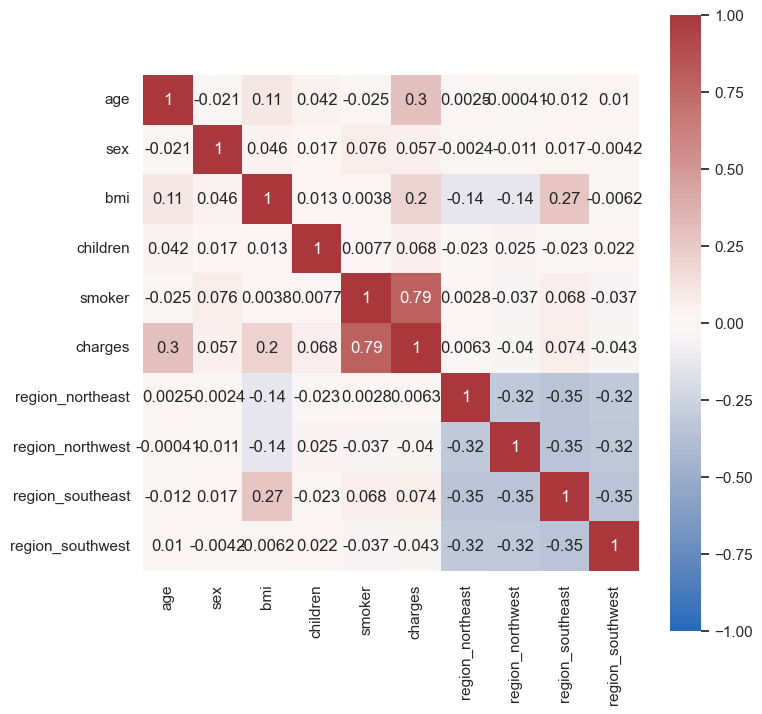

In [15]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

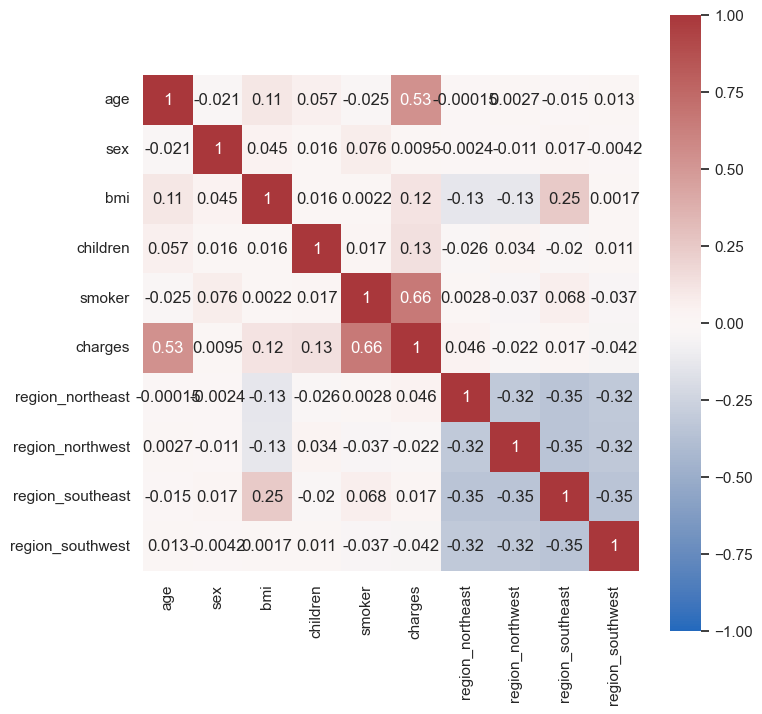

In [16]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    Spearman_correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

In [17]:
df.isnull().values.any()

False

In [18]:
bmi = pd.DataFrame(
    [
    {"BMI": "< 18.5", "Condition": "Underweight"},
    {"BMI": "18.5 - 24.9", "Condition": "Healthy weight"},
    {"BMI": "25.0 - 29.9", "Condition": "Overweight"},
    {"BMI": "35 > X > 30", "Condition": "Obesity, class 1"},
    {"BMI": "40 > X > 35", "Condition": "Obesity, class 2"},
    {"BMI": "< 40", "Condition": "Obesity, class 3"}
    ]
)
bmi

,BMI,Condition
0,< 18.5,Underweight
1,18.5 - 24.9,Healthy weight
2,25.0 - 29.9,Overweight
3,35 > X > 30,"Obesity, class 1"
4,40 > X > 35,"Obesity, class 2"
5,< 40,"Obesity, class 3"


In [19]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35) & (df['bmi'] < 40),
    (df['bmi'] >= 40) & (df['bmi'] < 45),
    (df['bmi'] >= 45)
]

results = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity, class 1', 'Obesity, class 2', 'Obesity, class 3']

df['BMI'] = np.select(conditions, results)

In [20]:
df['BMI'].value_counts().to_frame()

,BMI
Overweight,391
Healthy weight,386
Underweight,245
"Obesity, class 1",225
"Obesity, class 2",71
"Obesity, class 3",20


In [21]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1,Healthy weight
1,18,1,33.770,1,0,1725.55230,0,0,1,0,Overweight
2,28,1,33.000,3,0,4449.46200,0,0,1,0,Overweight
3,33,1,22.705,0,0,21984.47061,0,1,0,0,Underweight
4,32,1,28.880,0,0,3866.85520,0,1,0,0,Healthy weight


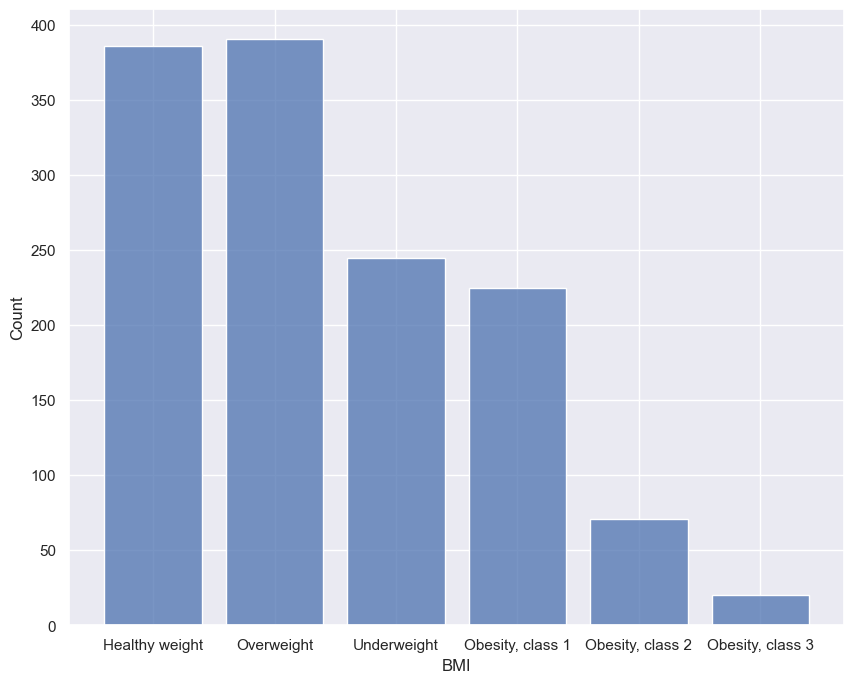

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(x='BMI', data=df, stat='count', shrink=0.8, palette='RdBu_r')
plt.style.use('seaborn-deep')
plt.show()

In [23]:
df['smoker'].value_counts().to_frame()

,smoker
0,1064
1,274


<AxesSubplot:ylabel='Frequency'>

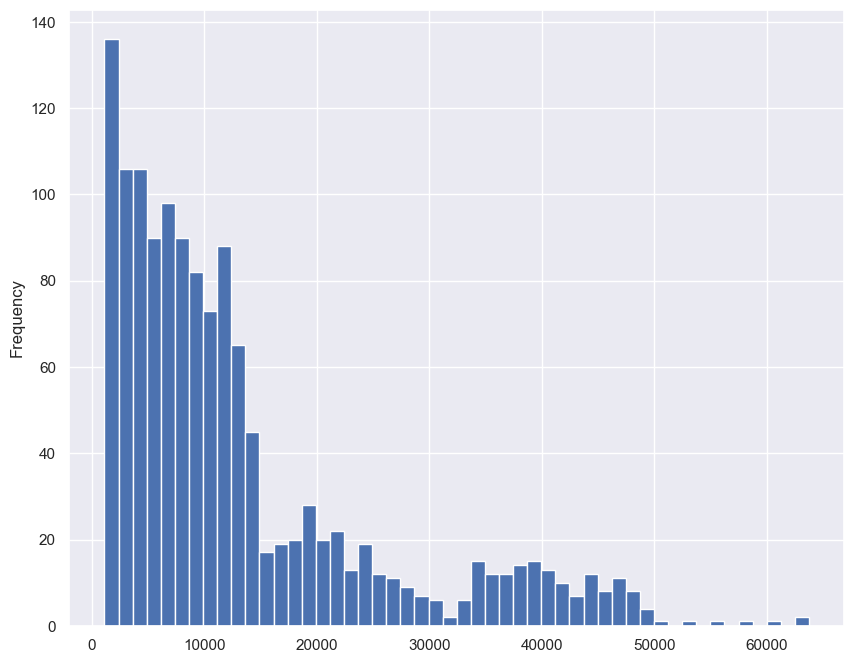

In [24]:
df['charges'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

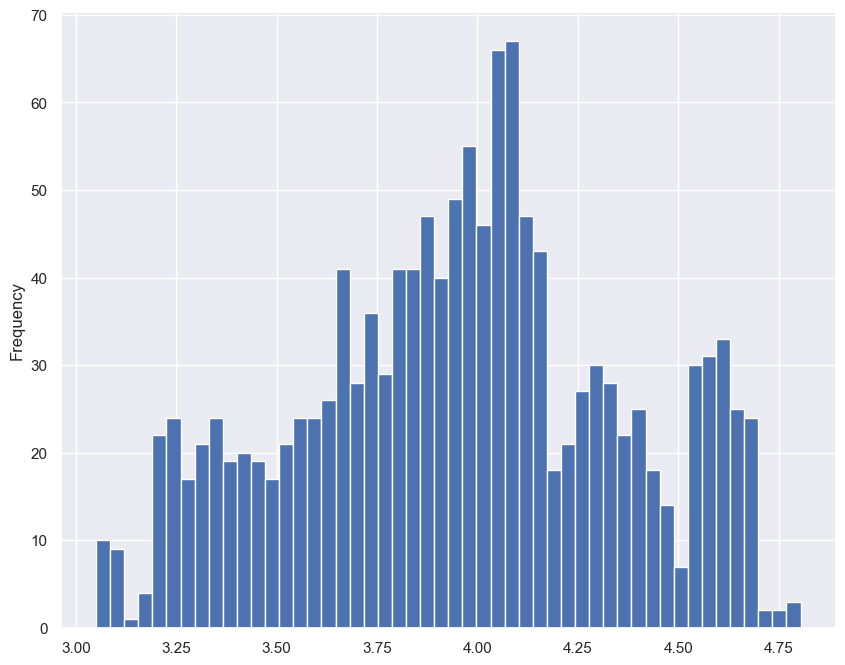

In [25]:
np.log10(df['charges']).plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

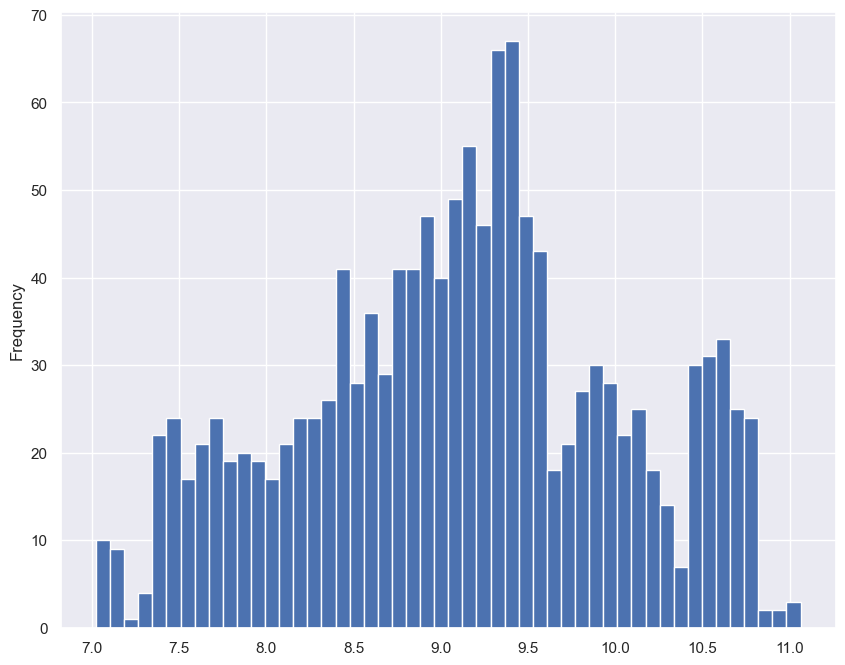

In [26]:
np.log(df['charges']).plot(kind='hist', bins=50)

In [27]:
nosmoke = df[df['smoker']==0]
smoke = df[df['smoker']==1]

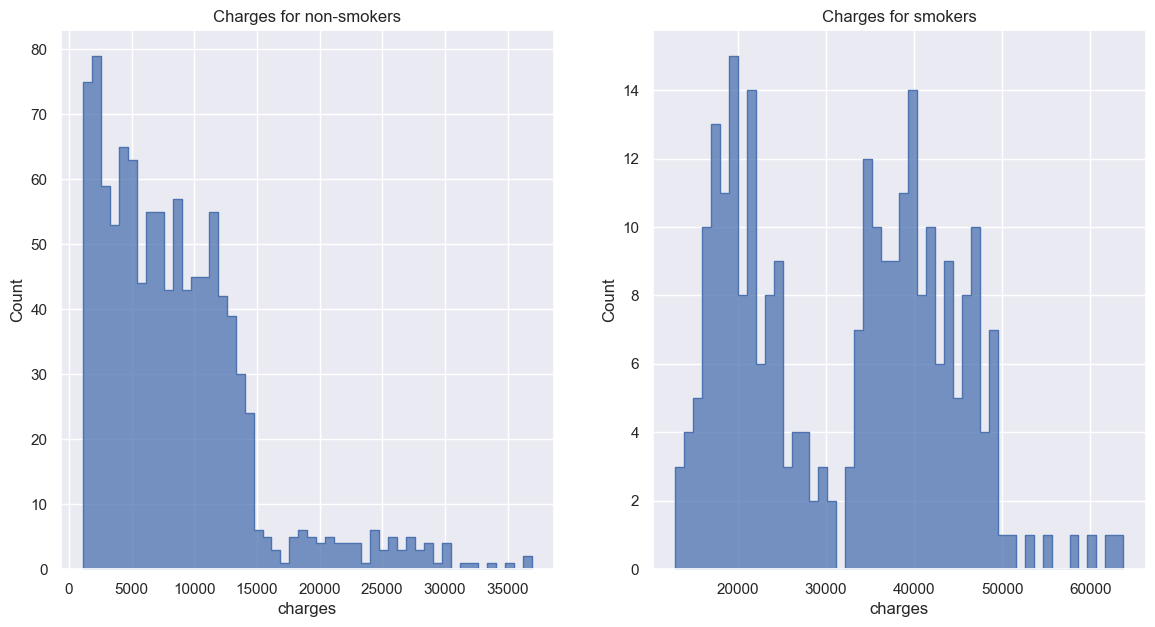

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(x='charges', data=nosmoke, ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

In [29]:
df['sex'].value_counts().to_frame('Count')

,Count
1,676
0,662


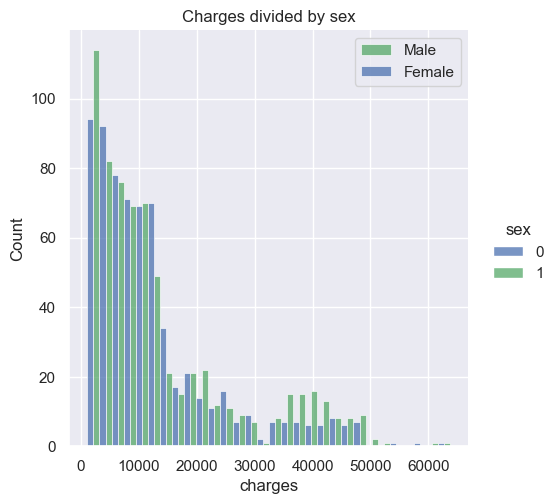

In [30]:
sns.displot(df, x='charges', hue='sex', multiple='dodge')
plt.title('Charges divided by sex')
plt.legend(['Male','Female'])

plt.show()

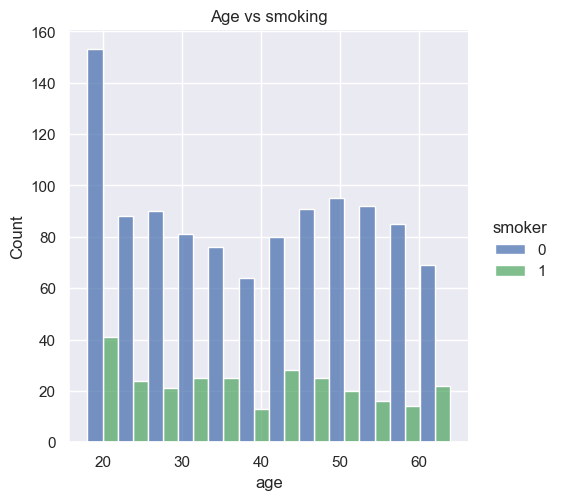

In [31]:
sns.displot(df, x='age', hue='smoker', multiple='dodge')
plt.title('Age vs smoking')

plt.show()

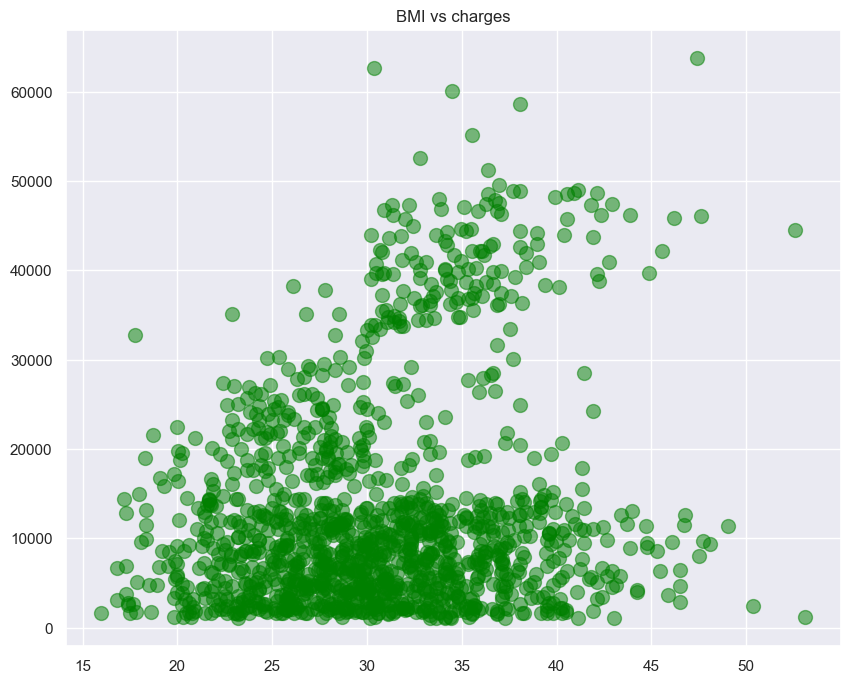

In [32]:
plt.scatter(df['bmi'], df['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

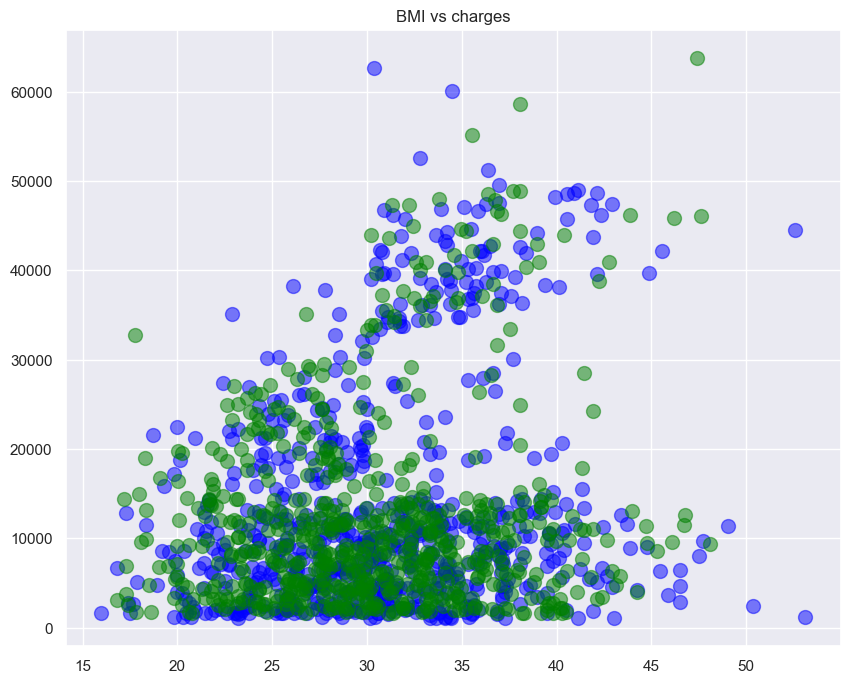

In [33]:
female = df[df['sex']==0]
male = df[df['sex']==1]
plt.scatter(male['bmi'], male['charges'],s=100, color='blue', alpha=0.5)
plt.scatter(female['bmi'], female['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

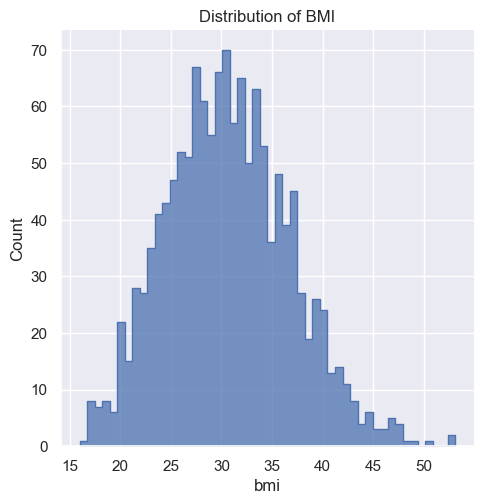

In [34]:
sns.displot(df, x='bmi',element='step', bins=50)
plt.title('Distribution of BMI')
plt.show()

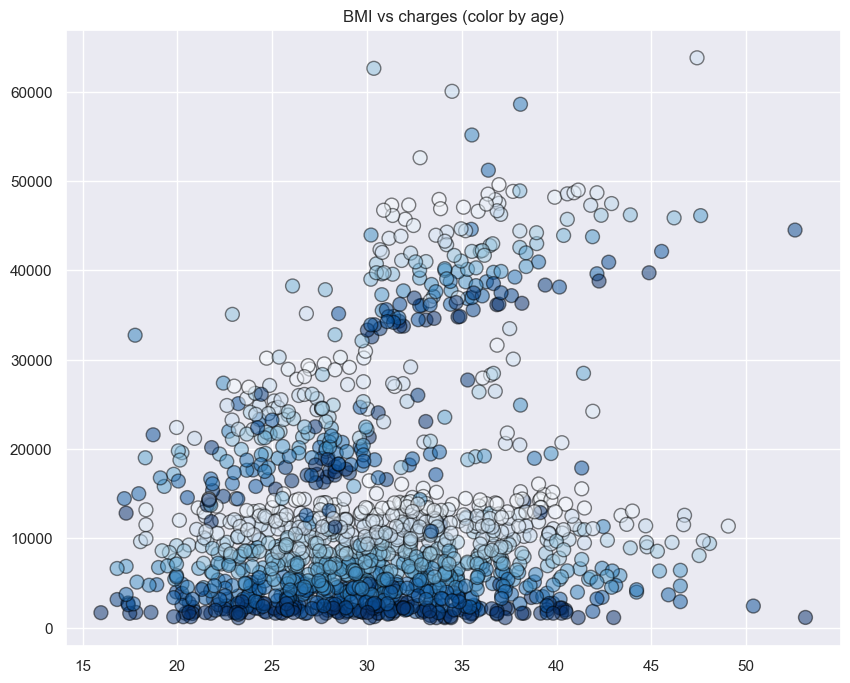

In [35]:
plt.scatter(df['bmi'], df['charges'],s=100, c=df["age"], cmap='Blues_r', alpha=0.5, edgecolors='Black')
plt.title('BMI vs charges (color by age)')
plt.show()

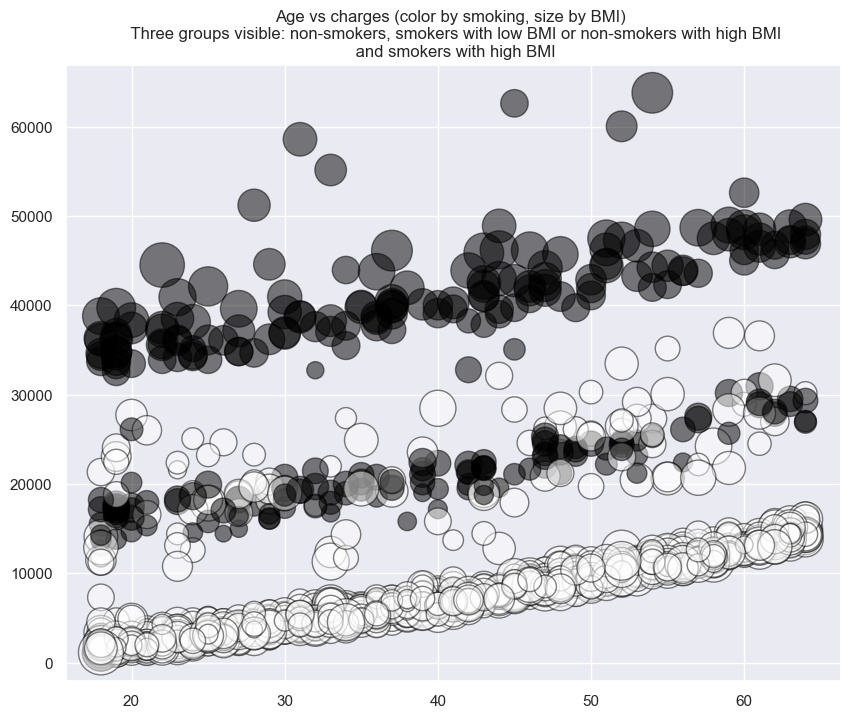

In [36]:
plt.scatter(df['age'], df['charges'], c=df['smoker'], cmap='gist_yarg', s=df["bmi"]**1.75, alpha=0.5, edgecolors='Black')
plt.title('Age vs charges (color by smoking, size by BMI) \n Three groups visible: non-smokers, \
smokers with low BMI or non-smokers with high BMI\
\n and smokers with high BMI')
plt.show()
# dodać legendę
# przenieść do plotly

***Modele*** Regresja liniowa, random forest, SVR, poszukać innych - np. regresja wielomianowa

***Miary sukcesu***
RMSE, r^2, MAE, MAPE, wizualizacja na scatter plocie

In [95]:
df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI,sex_0,sex_1,smoker_0,smoker_1
index,,,,,,,,,,,,,
0,-1.438764,-0.453320,-0.908614,16884.92400,0,0,0,1,Healthy weight,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,0,1,0,Overweight,0,1,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,0,1,0,Overweight,0,1,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,0,0,Underweight,0,1,1,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,0,0,Healthy weight,0,1,1,0


In [96]:
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV



In [97]:
#Skalowanie
scaler=StandardScaler()
df[['age','bmi','children']]=scaler.fit_transform(df[['age','bmi','children']])

In [98]:
df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI,sex_0,sex_1,smoker_0,smoker_1
index,,,,,,,,,,,,,
0,-1.438764,-0.453320,-0.908614,16884.92400,0,0,0,1,Healthy weight,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,0,1,0,Overweight,0,1,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,0,1,0,Overweight,0,1,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,0,0,Underweight,0,1,1,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,0,0,Healthy weight,0,1,1,0


In [109]:
X=df.drop(["charges","BMI"],axis='columns') #charges opłaty jako y więc dropuje, BMI jest kategoryczna więc też ją muszę usunąć


In [110]:
X

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_0,sex_1,smoker_0,smoker_1
index,,,,,,,,,,,
0,-1.438764,-0.453320,-0.908614,0,0,0,1,1,0,0,1
1,-1.509965,0.509621,-0.078767,0,0,1,0,0,1,1,0
2,-0.797954,0.383307,1.580926,0,0,1,0,0,1,1,0
3,-0.441948,-1.305531,-0.908614,0,1,0,0,0,1,1,0
4,-0.513149,-0.292556,-0.908614,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0,1,0,0,0,1,1,0
1334,-1.509965,0.206139,-0.908614,1,0,0,0,1,0,1,0
1335,-1.509965,1.014878,-0.908614,0,0,1,0,1,0,1,0


In [111]:
y=df['charges'] #y zmienna objaśniana, tą zmienną chcę przewidzieć


In [112]:
y

index
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [123]:
# Regresja liniowa

In [113]:
#train_test_split dzięlę na dane testowe i trenujące w proporcji "kciuka"
X_test, X_train, y_test, y_train =train_test_split(X,y,test_size=0.2,random_state=0)

In [126]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)


0.7321998735921029

In [118]:
lr.intercept_

20797.244431096806

In [119]:
lr.coef_

array([  3779.68178003,   2165.76471218,    753.55993013,   1023.8984811 ,
          296.01546495,   -499.96893849,   -819.94500755,    361.2517406 ,
         -361.2517406 , -12477.56679036,  12477.56679036])

In [ ]:
#Las losowy (random forest rf)

In [131]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv = 5)
print("Accuracy score dla Randam forest: ", rf_scores)
print("Average accuracy score dla Randam forest: ", rf_scores.mean())

Accuracy score dla Randam forest:  [0.85154534 0.88782396 0.90510986 0.76950858 0.80979719]
Average accuracy score dla Randam forest:  0.8447569862549968


In [130]:
#strojenie parametrów
def znajdz_najlepszy_model_gridsearchcv(X,y): 
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
        },
        'randomforest_regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

znajdz_najlepszy_model_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.767746,{'normalize': True}
1,lasso,0.767690,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.767880,"{'criterion': 'mse', 'splitter': 'random'}"
3,randomforest_regressor,0.871293,{'n_estimators': 150}


In [ ]:
##Predykcja

In [132]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error: 4899.974212638401
Mean Squared Error (MSE): 24009747.28452131
R-squared (R2) Score: 0.8325284788970098


In [133]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(metrics.r2_score(y_test, predictions))

0.8291115987223742


In [150]:
importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

fig = px.bar(feature_importances, x='feature', y='importance')

In [151]:
fig.show() # wykres pokazujący jaki wpływ na koszty mają poszczególne cechy objaśniające

In [153]:
#DO WNIOSKÓW NA KONIEC

#Przeanalizowaliśmy zbiór danych dotyczących kosztów leczenia, zawierający informacje takie jak wiek, płeć, BMI, liczba dzieci, status palacza, region i opłaty medyczne. 
#Przeprowadziliśmy różne techniki analizy danych m.in korelację między różnymi cechami zobrazowaliśmy znaczenie tych cech za pomocą różnych narzędzi do wizualizacji tj np. scater plot, barplot.

#Wygenerowaliśmy również modelr regresji, takich jak regresja liniowa, regresja lasso, drzewo decyzyjne i regresja lasów losowych, aby przewidzieć opłaty medyczne. 
#Po ocenie wydajności wszystkich modeli przy użyciu walidacji krzyżowej stwierdziliśmy, że model regresji lasów losowych zapewnia najlepsze wyniki pod względem dokładności.

#Wartość pierwiastka średniokwadratowego błędu (RMSE) wynosząca 4899,97 wskazuje, że przewidywane w modelu wartości opłat różnią się średnio o 4899,97 USD od rzeczywistych wartości opłat. Średni błąd kwadratowy (MSE) wynoszący 24009747,28 reprezentuje średnią kwadratów różnic między przewidywanymi a rzeczywistymi wartościami opłat. Wynik R-kwadrat (R2) wynoszący 0,8325 wskazuje, że około 83,25% zmienności można wytłumaczyć cechami zastosowanymi w modelu.

#Ogólnie rzecz biorąc, te wskaźniki oceny sugerują, że model Random Forest Regressor dobrze sprawdził się w przewidywaniu opłat medycznych na podstawie dostarczonego zestawu danych. Wykreśliliśmy również wizualną interpretację najważniejszych cech w zbiorze danych do przewidywania obciążeń medycznych i okazało się, że palenie papierosów jest najważniejszą cechą w zbiorze danych.

#Podsumowując, możemy powiedzieć, że model Random Forest Regression może skutecznie przewidywać opłaty medyczne na podstawie zadanego zbioru danych."""